# Gradient of Cost on a Batch of Data

In [2]:
import torch
import matplotlib.pyplot as plt

In [3]:
xs = torch.tensor([0, 1, 2, 3, 4, 5, 6, 7.])
ys = torch.tensor([1.86, 1.31, .62, .33, .09, -.67, -1.23, -1.37])

In [4]:
def regression(my_x, my_m, my_b):
  return my_m*my_x + my_b

In [5]:
m = torch.tensor([0.9]).requires_grad_()
b = torch.tensor([0.1]).requires_grad_()

**Step 1:** Forward Pass

In [6]:
yhats = regression(xs, m, b)
yhats

tensor([0.1000, 1.0000, 1.9000, 2.8000, 3.7000, 4.6000, 5.5000, 6.4000],
       grad_fn=<AddBackward0>)

**Step 2**: Compare $\hat{y}$ with true $y$ to calculate cost $C$

As in the [*Regression in PyTorch* notebook](https://github.com/jonkrohn/ML-foundations/blob/master/notebooks/regression-in-pytorch.ipynb), let's use mean squared error, which averages quadratic cost across multiple data points: $$C = \frac{1}{n} \sum_{i=1}^n (\hat{y_i}-y_i)^2 $$

In [7]:
def mse(my_yhat, my_y):
  sigma = torch.sum((my_yhat - my_y)**2)
  return sigma/len(my_y)

In [8]:
C = mse(yhats, ys)
C

tensor(19.6755, grad_fn=<DivBackward0>)

**Step 3:** Use autodiff to calculate gradient of C w.r.t. parameters

In [9]:
C.backward()

In [10]:
m.grad

tensor([36.3050])

In [11]:
b.grad

tensor([6.2650])

$$ \frac{\partial C}{\partial m} = \frac{2}{n} \sum (\hat{y}_i - y_i) \cdot x_i $$

In [14]:
2*1/len(ys)*torch.sum((yhats - ys)*xs)

tensor(36.3050, grad_fn=<MulBackward0>)

$$ \frac{\partial C}{\partial b} = \frac{2}{n} \sum (\hat{y}_i - y_i) $$

In [15]:
2*1/len(ys)*torch.sum((yhats - ys))

tensor(6.2650, grad_fn=<MulBackward0>)

In [16]:
gradient = torch.tensor([[b.grad.item(), m.grad.item()]]).T
gradient

tensor([[ 6.2650],
        [36.3050]])

In [30]:
def labeled_regression_plot(my_x, my_y, my_m, my_b, my_C, include_grad=True):

    title = 'Cost = {}'.format('%.3g' % my_C.item())
    if include_grad:
        xlabel = 'm = {}, m grad = {}'.format('%.3g' % my_m.item(), '%.3g' % my_m.grad.item())
        ylabel = 'b = {}, b grad = {}'.format('%.3g' % my_b.item(), '%.3g' % my_b.grad.item())
    else:
        xlabel = 'm = {}'.format('%.3g' % my_m.item())
        ylabel = 'b = {}'.format('%.3g' % my_b.item())

    fig, ax = plt.subplots()

    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)

    ax.scatter(my_x, my_y, zorder=3)

    x_min, x_max = ax.get_xlim()
    y_min = regression(x_min, my_m, my_b).detach().item()
    y_max = regression(x_max, my_m, my_b).detach().item()

    ax.set_xlim([x_min, x_max])
    _ = ax.plot([x_min, x_max], [y_min, y_max], c='C01')

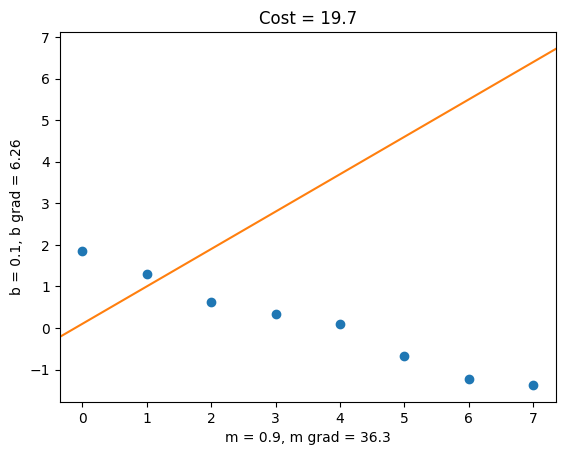

In [31]:
labeled_regression_plot(xs, ys, m, b, C)

**Step 4:** Gradient Descent

$\frac{\partial C}{\partial m} = 36.3$ indicates that an increase in $m$ corresponds to a large increase in $C$.

Meanwhile, $\frac{\partial C}{\partial b} = 6.26$ indicates that an increase in $b$ also corresponds to an increase in $C$, though much less so than $m$.

In the first round of training, the lowest hanging fruit with respect to reducing cost $C$ is therefore to decrease the slope of the regression line, $m$. There will also be a relatively small decrease in the $y$-intercept of the line, $b$.

In [32]:
optimizer = torch.optim.SGD([m, b], lr=0.01)

In [33]:
optimizer.step()

In [34]:
C = mse(regression(xs, m, b), ys)

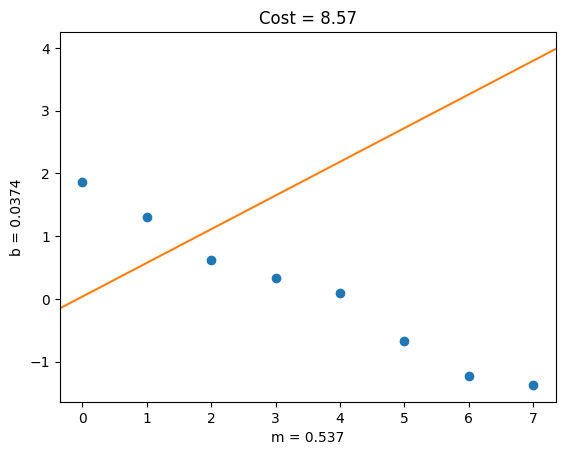

In [35]:
labeled_regression_plot(xs, ys, m, b, C, include_grad=False) # gradient of C hasnt been recalculated

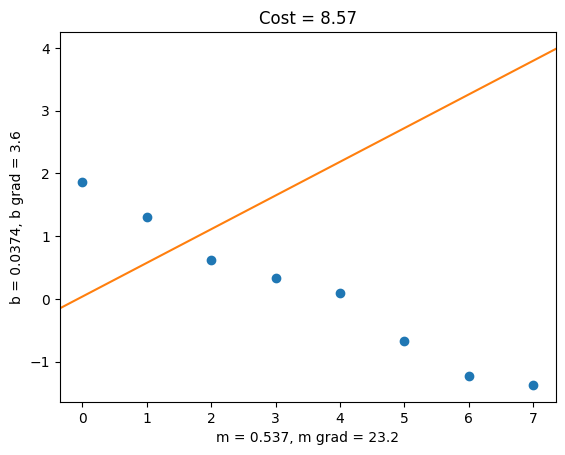

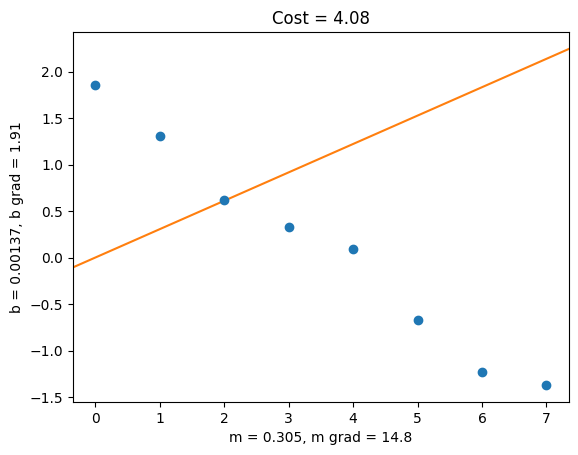

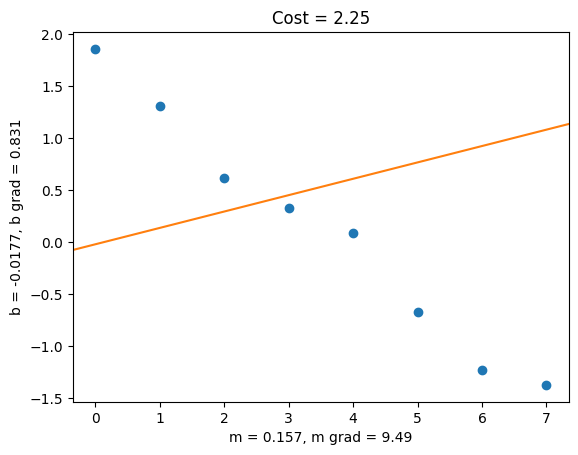

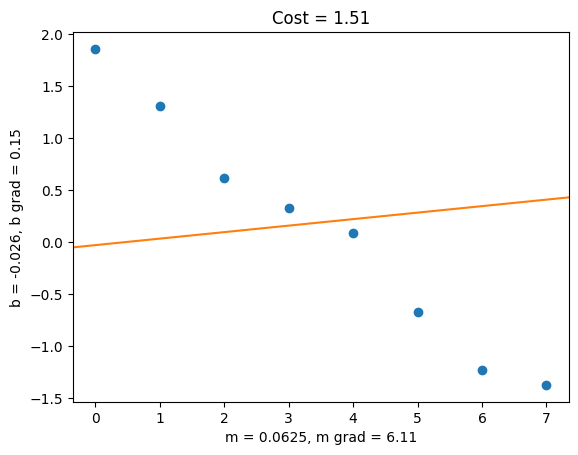

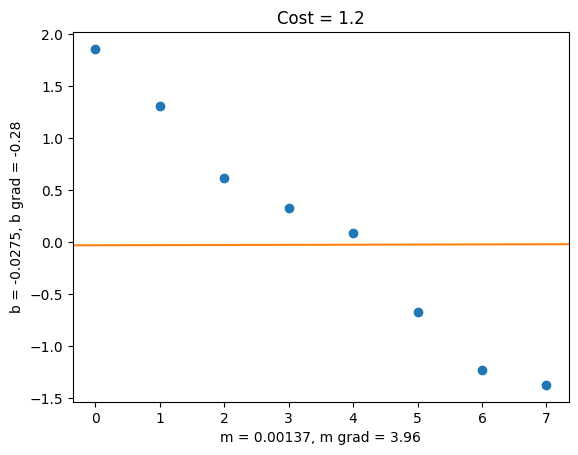

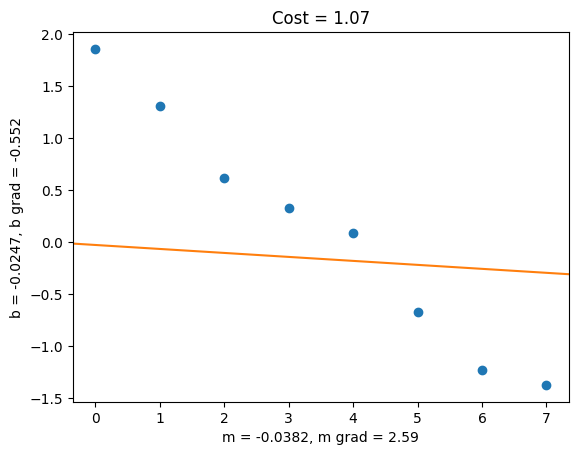

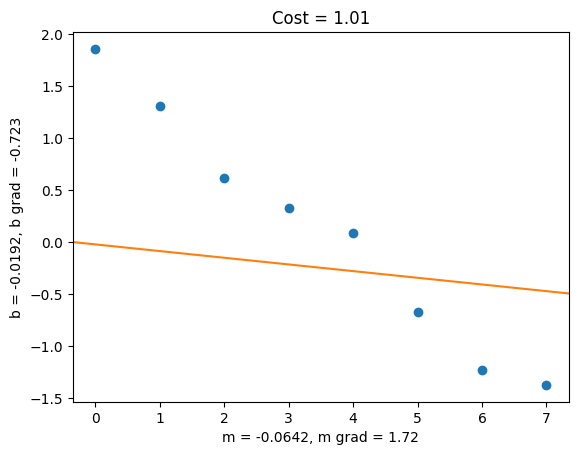

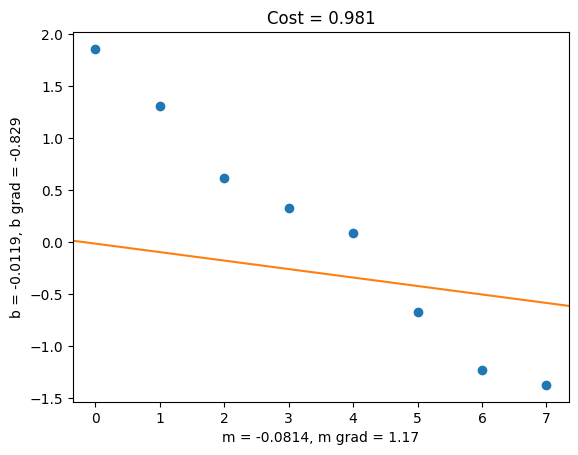

In [36]:
epochs = 8
for epoch in range(epochs):

  optimizer.zero_grad() # Reset gradients to zero; else they accumulate

  yhats = regression(xs, m, b) # Step 1
  C = mse(yhats, ys) # Step 2

  C.backward() # Step 3

  labeled_regression_plot(xs, ys, m, b, C)

  optimizer.step() # Step 4